In [1]:
import pandas as pd
import pathlib
import os
import numpy as np

np.random.seed(42)

data_dir = pathlib.Path(os.path.abspath('')).parent.parent.absolute()
output_dir = pathlib.Path(os.path.abspath('')).absolute() / 'processed_data'

In [2]:
train = pd.read_table(data_dir / 'artificial_train.data', sep=' ', header=None)
train = train.iloc[:, :-1]

y_train = pd.read_table(data_dir / 'artificial_train.labels', sep=' ', header=None)
y_train.rename(columns={0: 'label'}, inplace=True)

train = pd.concat([train, y_train], axis=1)

X_test = pd.read_table(data_dir / 'artificial_test.data', sep=' ', header=None)
X_test = X_test.iloc[:, :-1]

In [3]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,label
0,485,477,537,479,452,471,491,476,475,473,...,481,477,485,511,485,481,479,475,496,-1
1,483,458,460,487,587,475,526,479,485,469,...,478,487,338,513,486,483,492,510,517,-1
2,487,542,499,468,448,471,442,478,480,477,...,481,492,650,506,501,480,489,499,498,-1
3,480,491,510,485,495,472,417,474,502,476,...,480,474,572,454,469,475,482,494,461,1
4,484,502,528,489,466,481,402,478,487,468,...,479,452,435,486,508,481,504,495,511,1


In [4]:
X_test.head(1)

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,483,454,513,495,523,469,453,477,506,479,...,455,480,543,259,413,520,485,498,523,510


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train.iloc[:, :-1], train.iloc[:, -1], test_size=0.15, stratify=train.iloc[:, -1], random_state=42)

print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(1700, 500) (300, 500) (1700,) (300,)


In [6]:
# assert there are no missing values

assert X_train.isnull().sum().sum() == 0
assert X_val.isnull().sum().sum() == 0
assert X_test.isnull().sum().sum() == 0
assert y_train.isnull().sum().sum() == 0
assert y_val.isnull().sum().sum() == 0

In [7]:
y_train.value_counts()

label
-1    850
 1    850
Name: count, dtype: int64

In [8]:
y_val.value_counts()

label
-1    150
 1    150
Name: count, dtype: int64

# Lets remove highly correlated features in train set and save those features in a list

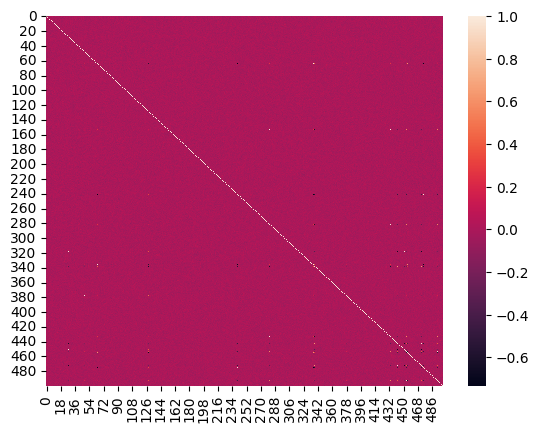

[128, 281, 318, 336, 378, 433, 451, 472, 475, 493]

In [9]:
# removing highly correlated features, but first let see heat map with correlation

import seaborn as sns
import matplotlib.pyplot as plt


sns.heatmap(X_train.corr())
plt.show()

corr_matrix = X_train.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]
to_drop

In [10]:
X_train.drop(to_drop, axis=1, inplace=True)
X_val.drop(to_drop, axis=1, inplace=True)
X_test.drop(to_drop, axis=1, inplace=True)

print(X_train.shape, X_val.shape, X_test.shape)

(1700, 490) (300, 490) (600, 490)


In [11]:
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,489,490,491,492,494,495,496,497,498,499
count,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,...,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,481.687647,483.579412,511.032353,483.388824,501.232353,479.332941,480.178824,476.555882,486.857059,478.867647,...,479.480000,482.558235,478.764706,486.024118,493.531765,511.248824,478.163529,483.399412,508.006471,489.878235
std,6.492044,30.232358,38.811942,9.053760,41.471997,6.765715,40.667978,1.370610,15.155274,7.219473,...,8.932891,20.713398,4.018196,24.116380,34.538931,37.621530,5.849824,13.423815,37.422747,25.795932
min,462.000000,381.000000,370.000000,453.000000,371.000000,459.000000,334.000000,471.000000,430.000000,455.000000,...,449.000000,407.000000,466.000000,391.000000,368.000000,398.000000,457.000000,435.000000,363.000000,403.000000
25%,477.000000,464.000000,486.000000,477.000000,475.000000,475.000000,453.000000,476.000000,477.000000,474.000000,...,474.000000,468.000000,476.000000,470.000000,470.000000,486.000000,474.000000,474.000000,482.000000,472.000000
50%,482.000000,483.000000,511.500000,483.000000,500.000000,479.000000,481.000000,477.000000,487.000000,479.000000,...,480.000000,482.000000,479.000000,485.000000,492.000000,511.000000,478.000000,484.000000,507.000000,490.000000
75%,486.000000,504.000000,537.000000,489.000000,527.000000,484.000000,507.000000,477.000000,497.000000,484.000000,...,485.000000,496.000000,481.000000,502.000000,517.000000,536.000000,482.000000,492.000000,533.000000,507.000000
max,503.000000,600.000000,654.000000,519.000000,688.000000,505.000000,611.000000,481.000000,536.000000,503.000000,...,513.000000,549.000000,497.000000,564.000000,615.000000,661.000000,500.000000,535.000000,644.000000,583.000000


In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [13]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

X_train_scaled.describe()

,0,1,2,3,4,5,6,7,8,9,...,489,490,491,492,494,495,496,497,498,499
count,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,...,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,0.480187,0.468399,0.496593,0.460437,0.410828,0.442020,0.527721,0.555588,0.536387,0.497243,...,0.476250,0.532100,0.411765,0.549272,0.508226,0.430604,0.492175,0.483994,0.516037,0.482657
std,0.158343,0.138047,0.136662,0.137178,0.130826,0.147081,0.146816,0.137061,0.142974,0.150406,...,0.139576,0.145869,0.129619,0.139401,0.139834,0.143048,0.136042,0.134238,0.133177,0.143311
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.365854,0.378995,0.408451,0.363636,0.328076,0.347826,0.429603,0.500000,0.443396,0.395833,...,0.390625,0.429577,0.322581,0.456647,0.412955,0.334601,0.395349,0.390000,0.423488,0.383333
50%,0.487805,0.465753,0.498239,0.454545,0.406940,0.434783,0.530686,0.600000,0.537736,0.500000,...,0.484375,0.528169,0.419355,0.543353,0.502024,0.429658,0.488372,0.490000,0.512456,0.483333
75%,0.585366,0.561644,0.588028,0.545455,0.492114,0.543478,0.624549,0.600000,0.632075,0.604167,...,0.562500,0.626761,0.483871,0.641618,0.603239,0.524715,0.581395,0.570000,0.604982,0.577778
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
# TO NIC NIE ZMIENIA

# from sklearn.preprocessing import RobustScaler

# robust_scaler = RobustScaler()
# X_train_robust = robust_scaler.fit_transform(X_train_scaled)
# X_val_robust = robust_scaler.transform(X_val_scaled)
# print(X_train_scaled.shape, X_val_scaled.shape)
# print(X_train_robust.shape, X_val_robust.shape)

In [15]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

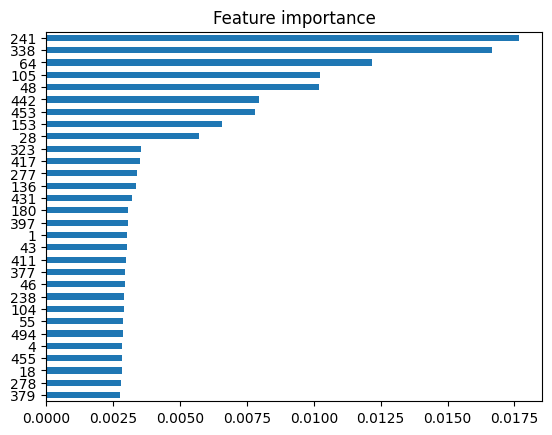

In [16]:
def plot_feature_importance(model, X_train, n=20):
    feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
    feat_importances.nlargest(n).sort_values(ascending=True).plot(kind='barh')
    plt.title('Feature importance')
    plt.show()

plot_feature_importance(model, X_train_scaled, 30)

In [17]:
sfm = SelectFromModel(model, threshold='0.9*mean')
X_train_selected = sfm.fit_transform(X_train_scaled, y_train)
X_val_selected = sfm.transform(X_val_scaled)
X_test_selected = sfm.transform(X_test_scaled)
print(X_train_selected.shape)
print(X_val_selected.shape)
print(X_test_selected.shape)

(1700, 271)
(300, 271)
(600, 271)


In [18]:
X_train_selected = pd.DataFrame(X_train_selected, columns=X_train.columns[sfm.get_support()])
X_val_selected = pd.DataFrame(X_val_selected, columns=X_train.columns[sfm.get_support()])
X_test_selected = pd.DataFrame(X_test_selected, columns=X_train.columns[sfm.get_support()])

In [19]:
X_train_selected.to_csv(output_dir / 'X_train.csv', index=False)
X_val_selected.to_csv(output_dir / 'X_val.csv', index=False)
X_test_selected.to_csv(output_dir / 'X_test.csv', index=False)
y_train.to_csv(output_dir / 'y_train.csv', index=False)
y_val.to_csv(output_dir / 'y_val.csv', index=False)